# MNIST Dataset

In [58]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 
import os

In [59]:
mnist = tf.keras.datasets.mnist

In [60]:
(x_train_f,y_train_f), (x_test,y_test) = mnist.load_data()

In [61]:
x_train_f.shape

(60000, 28, 28)

In [62]:
x_test.shape

(10000, 28, 28)

In [63]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
x_valid, x_train = x_train_f[:5000] / 255., x_train_f[5000:] / 255.
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]

# scale the test set as well
x_test = x_test / 255.


In [64]:
x_train[0].shape

(28, 28)

In [65]:
y_train[0]

7

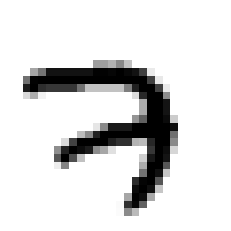

In [66]:
plt.imshow(x_train[0], cmap="binary")
plt.axis("off")
plt.show()

<AxesSubplot:>

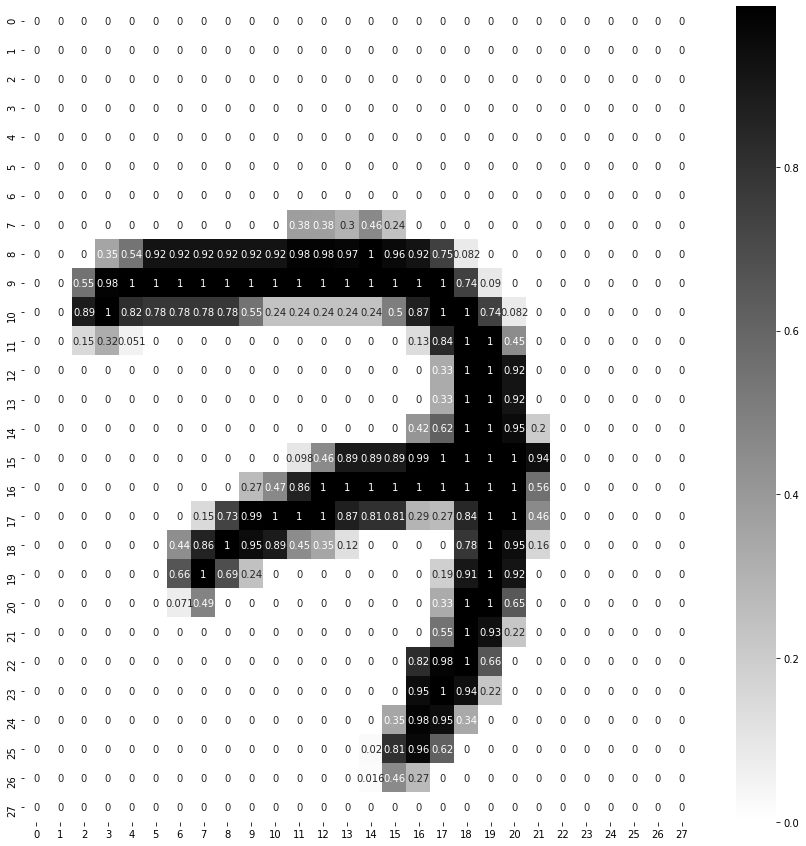

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [69]:
model.layers

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [72]:
hidden1.get_weights()

[array([[ 0.04862489, -0.03389576, -0.00042489, ..., -0.00675266,
          0.04703925, -0.02063948],
        [ 0.07382195,  0.03483029, -0.00297168, ...,  0.04487276,
         -0.07272362, -0.00835603],
        [-0.06041843,  0.01103119,  0.0599961 , ...,  0.04125236,
         -0.0580246 , -0.03609886],
        ...,
        [-0.03612818,  0.01050654, -0.02765477, ..., -0.06153001,
          0.04764675, -0.07246546],
        [ 0.03895002, -0.05828703, -0.06065789, ...,  0.026625  ,
          0.02326719, -0.01452166],
        [-0.06776396, -0.03878327, -0.03460215, ...,  0.02303676,
          0.03628283, -0.06206374]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [73]:
weights , biases = hidden1.get_weights()

In [74]:
weights

array([[ 0.04862489, -0.03389576, -0.00042489, ..., -0.00675266,
         0.04703925, -0.02063948],
       [ 0.07382195,  0.03483029, -0.00297168, ...,  0.04487276,
        -0.07272362, -0.00835603],
       [-0.06041843,  0.01103119,  0.0599961 , ...,  0.04125236,
        -0.0580246 , -0.03609886],
       ...,
       [-0.03612818,  0.01050654, -0.02765477, ..., -0.06153001,
         0.04764675, -0.07246546],
       [ 0.03895002, -0.05828703, -0.06065789, ...,  0.026625  ,
         0.02326719, -0.01452166],
       [-0.06776396, -0.03878327, -0.03460215, ...,  0.02303676,
         0.03628283, -0.06206374]], dtype=float32)

In [75]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [76]:

model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [77]:
# 55000/32, batch size=32 by default

In [78]:
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=30,validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2154 - accuracy: 0.9352 - val_loss: 0.1040 - val_accuracy: 0.9702
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0893 - accuracy: 0.9725 - val_loss: 0.0800 - val_accuracy: 0.9760
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0730 - val_accuracy: 0.9774
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0690 - val_accuracy: 0.9792
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.0721 - val_accuracy: 0.9812
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0771 - val_accuracy: 0.9818
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0888 - val_accuracy:

In [79]:
UNIQUE_PATH = model.save("C:/Users/prakh/Desktop/d drive/In (ML and DL)/In (ML and DL)/Class Codes/tf2/tf2/ANN/model.h5")

In [80]:
# To open this model.h5 file we have to use netron

In [81]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [82]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.215441,0.935164,0.103984,0.9702
1,0.089253,0.972455,0.079990,0.9760
2,0.059079,0.981145,0.073029,0.9774
3,0.044810,0.985727,0.068990,0.9792
4,0.034229,0.988564,0.072140,0.9812
5,0.027877,0.991345,0.077135,0.9818
6,0.023108,0.992345,0.088752,0.9780
7,0.020436,0.993218,0.083919,0.9796
8,0.018327,0.993473,0.091817,0.9802
9,0.016510,0.994891,0.098190,0.9796


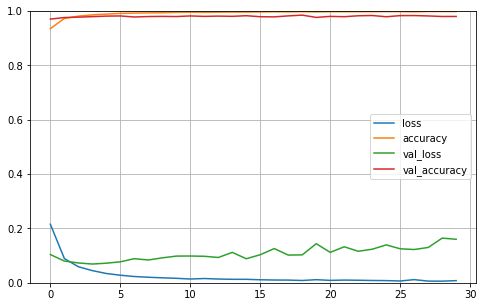

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [84]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 633us/step - loss: 0.1568 - accuracy: 0.9790


[0.15677303075790405, 0.9789999723434448]

In [105]:
x_test[:3].shape

(3, 28, 28)

In [106]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [104]:
y_pred=model.predict_classes(x_test[:3])
y_pred

c:\users\prakh\anaconda3\envs\tensorflow2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1], dtype=int64)

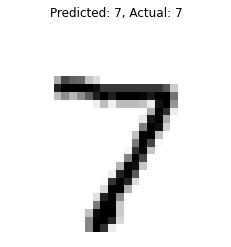

------------------------------------------------------------


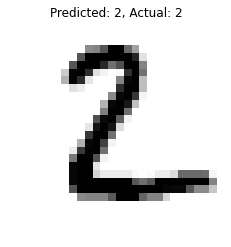

------------------------------------------------------------


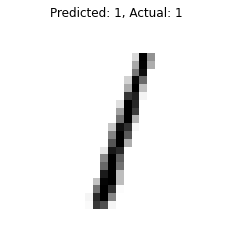

------------------------------------------------------------


In [107]:
for data, pred, actual in zip(x_test[:3] , y_pred,y_test[:3]):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
# Predict real image

In [228]:
from PIL import Image
import numpy as np
img = Image.open("three.PNG")
im=np.array(Image.open("three.PNG"))

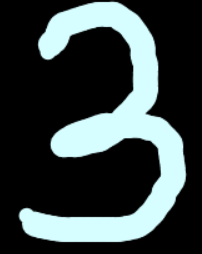

In [229]:
img

In [230]:
im.shape

(254, 202, 4)

In [231]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [232]:
a = rgb2gray(im)

In [233]:
a.shape

(254, 202)

In [234]:
import cv2
a = cv2.resize(a,(28,28))

In [235]:
a.shape

(28, 28)

In [236]:
a = a.reshape(1,28,28)

In [237]:
a.shape

(1, 28, 28)

In [238]:
y_pred = model.predict_classes(a)
y_pred

array([3], dtype=int64)

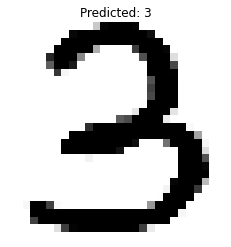

------------------------------------------------------------


In [239]:
for data, pred in zip(a, y_pred):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}")
    plt.axis('off')
    plt.show()
    print("---"*20)